In [1]:
import pandas as pd

In [2]:
bioclimatic_data = pd.read_csv('PA-train-bioclimatic.csv')
merged_data = pd.read_csv('cluster_with_pollution_data.csv')

In [3]:
print(bioclimatic_data.columns)

Index(['surveyId', 'Bio1', 'Bio2', 'Bio3', 'Bio4', 'Bio5', 'Bio6', 'Bio7',
       'Bio8', 'Bio9', 'Bio10', 'Bio11', 'Bio12', 'Bio13', 'Bio14', 'Bio15',
       'Bio16', 'Bio17', 'Bio18', 'Bio19'],
      dtype='object')


# Particle Swarm Optimization

In [4]:
# import pandas as pd
# import ast  # To parse string representation of lists into actual lists
# import matplotlib.pyplot as plt
# import numpy as np
# from pyswarm import pso
# import random

# # Set random seed for reproducibility
# random.seed(42)
# np.random.seed(42)

# # Load and preprocess data
# def load_data():
#     merged_data = pd.read_csv('cluster_with_pollution_data.csv')

#     # Convert necessary columns from string representation of lists to actual lists
#     merged_data['coordinates_lon'] = merged_data['coordinates_lon'].apply(ast.literal_eval)
#     merged_data['coordinates_lat'] = merged_data['coordinates_lat'].apply(ast.literal_eval)
#     merged_data['speciesId'] = merged_data['speciesId'].apply(ast.literal_eval)
#     return merged_data

# # Define a function to calculate the fitness of a cluster
# def fitness_function(cluster, merged_data):
#     # Extract relevant pollution data for the cluster
#     cluster_data = merged_data[merged_data['cluster'] == cluster]
    
#     # Calculate a score based on AQI and other pollutants (lower is better)
#     score = 0
#     if not cluster_data.empty:
#         score += cluster_data['AQI'].mean() * 0.4  # Weight for AQI
#         score += cluster_data['CO'].mean() * 0.2   # Weight for CO
#         score += cluster_data['NO2'].mean() * 0.2  # Weight for NO2
#         score += cluster_data['PM2.5'].mean() * 0.2 # Weight for PM2.5
    
#     return score

# # PSO function to optimize cluster selection
# def optimize_clusters(merged_data):
#     lb = [0]  # Lower boundary
#     ub = [merged_data['cluster'].nunique() - 1]  # Upper boundary

#     def objective_function(x):
#         return fitness_function(int(x[0]), merged_data)

#     best_cluster, best_score = pso(objective_function, lb, ub)

#     return int(best_cluster), float(best_score)  # Return as scalar values

# # Function to plot clusters and highlight specified species
# def plot_clusters(df, input_species_id):
#     plt.figure(figsize=(15, 10))

#     found_species = False
#     cluster_id_with_species = None
#     all_species_in_cluster = set()

#     for idx, row in df.iterrows():
#         longitudes = row['coordinates_lon']
#         latitudes = row['coordinates_lat']
#         species_list = row['speciesId']
        
#         # Check if the input species_id is in the species_list
#         if input_species_id in species_list:
#             plt.scatter(longitudes, latitudes, s=2, alpha=0.5, color='red', label='Input Species' if not found_species else "")
#             found_species = True
#             cluster_id_with_species = row['cluster']  # Record the cluster ID with the input species
#             all_species_in_cluster.update(species_list)  # Collect all species in this cluster
#         else:
#             plt.scatter(longitudes, latitudes, s=2, alpha=0.5, color='lightgreen', label='Other Species' if idx == 0 else "")

#     # If species ID is found, print the cluster number and all species in it
#     if found_species:
#         print(f"Species ID {input_species_id} found in Cluster {cluster_id_with_species}.")
#         print(f"Species in Cluster {cluster_id_with_species}: {sorted(all_species_in_cluster)}")

#     # If species ID is not found, recommend the next best cluster
#     else:
#         print(f"Species ID {input_species_id} not found. Recommending the next best cluster.")
#         recommended_cluster, score = optimize_clusters(df)
#         print(f"Recommended Cluster: {recommended_cluster}, Score: {score}")
        
#         # Highlight the recommended cluster in blue
#         recommended_cluster_data = df[df['cluster'] == recommended_cluster]
#         all_species_in_cluster = set()

#         for idx, row in recommended_cluster_data.iterrows():
#             plt.scatter(row['coordinates_lon'], row['coordinates_lat'], s=5, alpha=0.5, color='blue', label='Recommended Cluster')
#             all_species_in_cluster.update(row['speciesId'])  # Collect all species in this cluster

#         # Print all species present in the recommended cluster
#         print(f"Species in Recommended Cluster {recommended_cluster}: {sorted(all_species_in_cluster)}")

#     plt.title('Scatter Plot of Coordinates by Cluster')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Clusters')
#     plt.show()

# # Main function to load data and run plotting
# def main():
#     # Load data
#     merged_data = load_data()

#     # Get user input for species ID
#     try:
#         input_species_id = int(input("Enter the species ID to highlight: "))
#     except ValueError:
#         print("Invalid input. Please enter a numerical species ID.")
#         return

#     print(f"Selected Species ID: {input_species_id}")

#     # Plot clusters and highlight the specified species
#     plot_clusters(merged_data, input_species_id)

# # Run the main function
# if __name__ == "__main__":
#     main()

In [5]:
# def remove_species_from_cluster(df, cluster_id, species_id_to_remove):
#     # Check if the cluster contains the species
#     if cluster_id is None:
#         print("No cluster ID provided to remove species from.")
#         return df

#     print(f"Attempting to remove Species ID {species_id_to_remove} from Cluster {cluster_id}.")

#     # Define a function to remove the species ID from the list
#     def remove_species(species_list):
#         if isinstance(species_list, list) and species_id_to_remove in species_list:
#             species_list.remove(species_id_to_remove)
#         return species_list

#     # Apply the removal function to the rows in the specified cluster
#     df.loc[df['cluster'] == cluster_id, 'speciesId'] = df.loc[df['cluster'] == cluster_id, 'speciesId'].apply(remove_species)

#     # Confirm the change
#     if species_id_to_remove in df[df['cluster'] == cluster_id]['speciesId'].explode().unique():
#         print(f"Error: Species ID {species_id_to_remove} still found in Cluster {cluster_id}.")
#     else:
#         print(f"Species ID {species_id_to_remove} successfully removed from Cluster {cluster_id}.")
    
#     return df

# # Example usage
# # Assuming `merged_data` is the DataFrame with your data and `recommended_cluster` is the identified cluster from main code
# species_id_to_remove = 6874  # Replace with the actual species ID you want to remove
# cluster_id_to_modify = 4044  # Replace with the actual cluster ID if known

# # Remove the species ID from the specified cluster
# merged_data = remove_species_from_cluster(merged_data, cluster_id_to_modify, species_id_to_remove)


In [ ]:
# import pandas as pd
# import ast  # To parse string representation of lists into actual lists
# import matplotlib.pyplot as plt
# import numpy as np
# from ahpy import Compare  # For AHP
# from sklearn.preprocessing import MinMaxScaler  # For normalization in TOPSIS

# # Load and preprocess data
# def load_data():
#     merged_data = pd.read_csv('cluster_with_pollution_data.csv')
#     merged_data['coordinates_lon'] = merged_data['coordinates_lon'].apply(ast.literal_eval)
#     merged_data['coordinates_lat'] = merged_data['coordinates_lat'].apply(ast.literal_eval)
#     merged_data['speciesId'] = merged_data['speciesId'].apply(ast.literal_eval)
#     return merged_data

# # Define a function to calculate criteria for each cluster
# def calculate_criteria(df):
#     # AQI Impact based on pollution data (e.g., AQI, CO, NO2, PM2.5)
#     df['AQI_Impact'] = 0.4 * df['AQI'] + 0.2 * df['CO'] + 0.2 * df['NO2'] + 0.2 * df['PM2.5']
    
#     # Species Importance as the count of unique species in each cluster
#     df['Species_Importance'] = df['speciesId'].apply(lambda x: len(set(x)))
    
#     # Tree Density based on the number of locations per cluster
#     df['Tree_Density'] = df['coordinates_lon'].apply(len)
#     return df

# # Step 1: AHP to determine weights of criteria
# def calculate_ahp_weights():
#     criteria = {
#         ('AQI_Impact', 'Species_Importance'): 3,
#         ('AQI_Impact', 'Tree_Density'): 5,
#         ('Species_Importance', 'Tree_Density'): 2,
#     }
#     comparison = Compare('Criteria', criteria, precision=3)
#     weights = comparison.target_weights
#     print("AHP Criteria Weights:", weights)
#     print("Consistency Ratio:", comparison.consistency_ratio)
#     return weights

# # Step 2: TOPSIS - Rank clusters based on AHP weights
# def topsis_ranking(df, weights):
#     # Normalize the criteria
#     scaler = MinMaxScaler()
#     criteria_data = df[['AQI_Impact', 'Species_Importance', 'Tree_Density']]
#     normalized_data = scaler.fit_transform(criteria_data)

#     # Apply weights from AHP
#     weighted_data = normalized_data * np.array(list(weights.values()))

#     # Calculate ideal (best) and negative-ideal (worst) solutions
#     ideal_solution = np.max(weighted_data, axis=0)
#     negative_ideal_solution = np.min(weighted_data, axis=0)

#     # Calculate distances to ideal and negative-ideal solutions
#     dist_to_ideal = np.sqrt(np.sum((weighted_data - ideal_solution) ** 2, axis=1))
#     dist_to_negative_ideal = np.sqrt(np.sum((weighted_data - negative_ideal_solution) ** 2, axis=1))

#     # Calculate relative closeness to ideal solution
#     topsis_score = dist_to_negative_ideal / (dist_to_ideal + dist_to_negative_ideal)
#     df['TOPSIS_Score'] = topsis_score

#     # Rank clusters based on TOPSIS score (higher score is closer to the ideal)
#     ranked_df = df.sort_values(by='TOPSIS_Score', ascending=False)
#     return ranked_df

# # Function to plot clusters and highlight specified species
# def plot_clusters(df, input_species_id):
#     plt.figure(figsize=(15, 10))

#     found_species = False
#     cluster_id_with_species = None
#     all_species_in_cluster = set()

#     for idx, row in df.iterrows():
#         longitudes = row['coordinates_lon']
#         latitudes = row['coordinates_lat']
#         species_list = row['speciesId']
        
#         # Check if the input species_id is in the species_list
#         if input_species_id in species_list:
#             plt.scatter(longitudes, latitudes, s=2, alpha=0.5, color='red', label='Input Species' if not found_species else "")
#             found_species = True
#             cluster_id_with_species = row['cluster']  # Record the cluster ID with the input species
#             all_species_in_cluster.update(species_list)  # Collect all species in this cluster
#         else:
#             plt.scatter(longitudes, latitudes, s=2, alpha=0.5, color='lightgreen', label='Other Species' if idx == 0 else "")

#     # If species ID is found, print the cluster number and all species in it
#     if found_species:
#         print(f"Species ID {input_species_id} found in Cluster {cluster_id_with_species}.")
#         print(f"Species in Cluster {cluster_id_with_species}: {sorted(all_species_in_cluster)}")

#     # If species ID is not found, recommend the next best cluster
#     else:
#         print(f"Species ID {input_species_id} not found. Recommending the next best cluster.")
#         recommended_cluster = topsis_ranking(df, calculate_ahp_weights()).iloc[0]
#         print(f"Recommended Cluster: {recommended_cluster['cluster']}, Score: {recommended_cluster['TOPSIS_Score']}")
        
#         # Highlight the recommended cluster in blue
#         recommended_cluster_data = df[df['cluster'] == recommended_cluster['cluster']]
#         all_species_in_cluster = set()

#         for idx, row in recommended_cluster_data.iterrows():
#             plt.scatter(row['coordinates_lon'], row['coordinates_lat'], s=5, alpha=0.5, color='blue', label='Recommended Cluster')
#             all_species_in_cluster.update(row['speciesId'])  # Collect all species in this cluster

#         # Print all species present in the recommended cluster
#         print(f"Species in Recommended Cluster {recommended_cluster['cluster']}: {sorted(all_species_in_cluster)}")

#     plt.title('Scatter Plot of Coordinates by Cluster')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Clusters')
#     plt.show()

# # Main function to load data and run AHP + TOPSIS
# def main():
#     # Load and prepare data
#     merged_data = load_data()
#     merged_data = calculate_criteria(merged_data)

#     # Get user input for species ID
#     try:
#         input_species_id = int(input("Enter the species ID to highlight: "))
#     except ValueError:
#         print("Invalid input. Please enter a numerical species ID.")
#         return

#     print(f"Selected Species ID: {input_species_id}")

#     # Plot clusters and highlight the specified species
#     plot_clusters(merged_data, input_species_id)

# # Run the main function
# if __name__ == "__main__":
#     main()

In [ ]:
# def remove_species_from_cluster(df, cluster_id, species_id_to_remove):
#     # Check if the cluster contains the species
#     if cluster_id is None:
#         print("No cluster ID provided to remove species from.")
#         return df

#     print(f"Attempting to remove Species ID {species_id_to_remove} from Cluster {cluster_id}.")

#     # Define a function to remove the species ID from the list
#     def remove_species(species_list):
#         if isinstance(species_list, list) and species_id_to_remove in species_list:
#             species_list.remove(species_id_to_remove)
#         return species_list

#     # Apply the removal function to the rows in the specified cluster
#     df.loc[df['cluster'] == cluster_id, 'speciesId'] = df.loc[df['cluster'] == cluster_id, 'speciesId'].apply(remove_species)

#     # Confirm the change
#     if species_id_to_remove in df[df['cluster'] == cluster_id]['speciesId'].explode().unique():
#         print(f"Error: Species ID {species_id_to_remove} still found in Cluster {cluster_id}.")
#     else:
#         print(f"Species ID {species_id_to_remove} successfully removed from Cluster {cluster_id}.")
    
#     return df

# # Example usage
# # Assuming `merged_data` is the DataFrame with your data and `recommended_cluster` is the identified cluster from main code
# species_id_to_remove = 6874  # Replace with the actual species ID you want to remove
# cluster_id_to_modify = 10788  # Replace with the actual cluster ID if known

# # Remove the species ID from the specified cluster
# merged_data = remove_species_from_cluster(merged_data, cluster_id_to_modify, species_id_to_remove)


Selected Species ID: 6874
Species ID 6874 found in Cluster 10788.
Species in Cluster 10788: [30.0, 37.0, 51.0, 67.0, 69.0, 74.0, 76.0, 81.0, 82.0, 140.0, 141.0, 146.0, 148.0, 154.0, 164.0, 180.0, 192.0, 203.0, 216.0, 238.0, 245.0, 249.0, 252.0, 254.0, 262.0, 265.0, 267.0, 269.0, 271.0, 272.0, 305.0, 311.0, 320.0, 326.0, 340.0, 351.0, 354.0, 355.0, 365.0, 392.0, 400.0, 410.0, 413.0, 423.0, 436.0, 446.0, 449.0, 450.0, 461.0, 462.0, 476.0, 480.0, 491.0, 493.0, 494.0, 495.0, 509.0, 515.0, 522.0, 540.0, 544.0, 545.0, 553.0, 558.0, 559.0, 578.0, 581.0, 628.0, 633.0, 636.0, 639.0, 661.0, 687.0, 694.0, 701.0, 712.0, 715.0, 751.0, 752.0, 783.0, 787.0, 795.0, 812.0, 822.0, 838.0, 850.0, 857.0, 868.0, 876.0, 877.0, 886.0, 887.0, 893.0, 895.0, 902.0, 906.0, 908.0, 923.0, 944.0, 945.0, 949.0, 950.0, 960.0, 963.0, 976.0, 981.0, 982.0, 986.0, 996.0, 999.0, 1014.0, 1015.0, 1018.0, 1019.0, 1027.0, 1051.0, 1062.0, 1071.0, 1073.0, 1092.0, 1099.0, 1119.0, 1121.0, 1125.0, 1132.0, 1139.0, 1140.0, 1152.0, 11

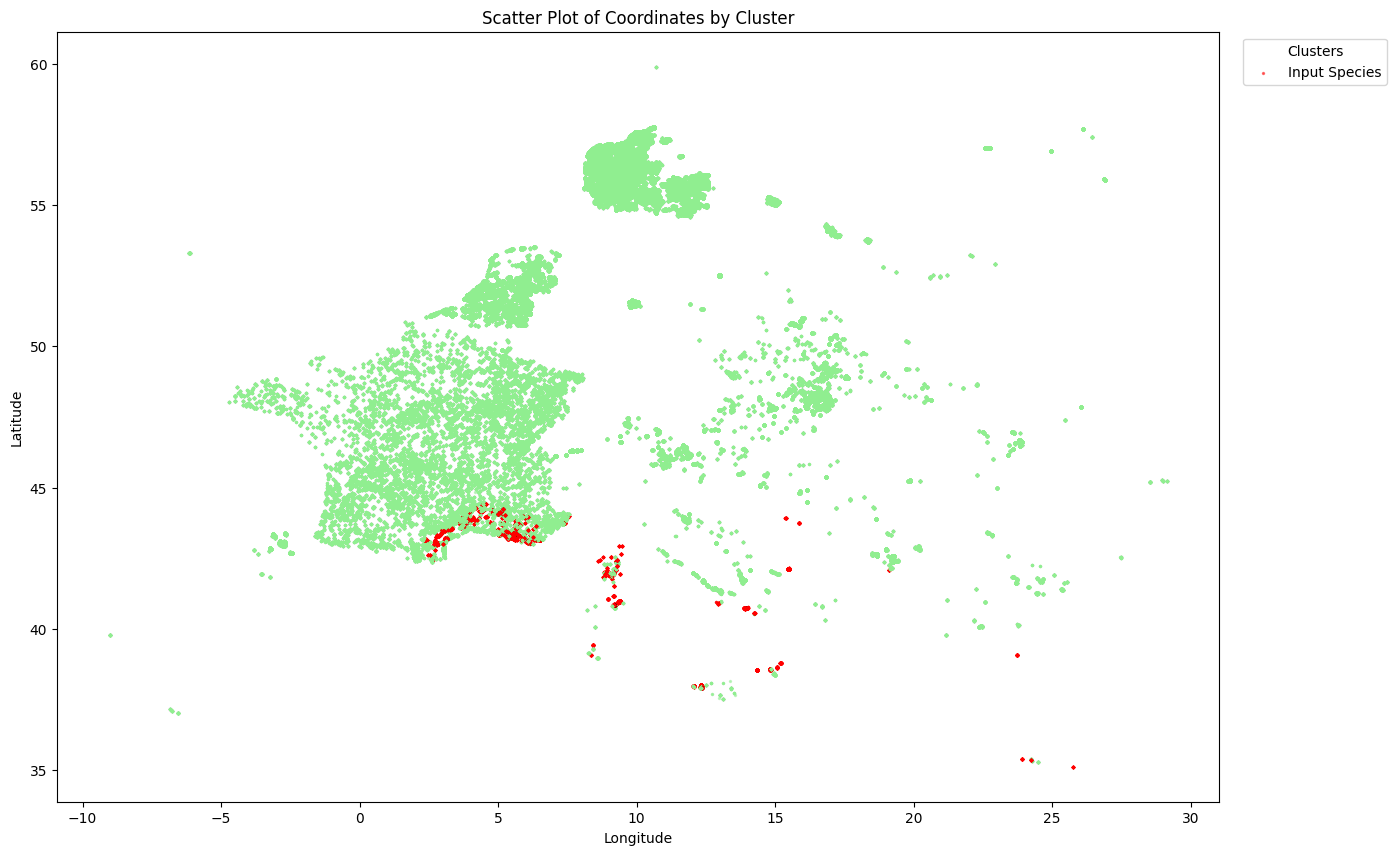

In [8]:
import pandas as pd
import ast  # To parse string representation of lists into actual lists
import matplotlib.pyplot as plt
import numpy as np
from ahpy import Compare  # For AHP
from sklearn.preprocessing import MinMaxScaler  # For normalization in TOPSIS

# Load and preprocess data
def load_data():
    merged_data = pd.read_csv('cluster_with_pollution_data.csv')
    merged_data['coordinates_lon'] = merged_data['coordinates_lon'].apply(ast.literal_eval)
    merged_data['coordinates_lat'] = merged_data['coordinates_lat'].apply(ast.literal_eval)
    merged_data['speciesId'] = merged_data['speciesId'].apply(ast.literal_eval)
    return merged_data

# Define a function to calculate criteria for each cluster
def calculate_criteria(df):
    # AQI Impact based on pollution data (e.g., AQI, CO, NO2, PM2.5)
    df['AQI_Impact'] = 0.4 * df['AQI'] + 0.2 * df['CO'] + 0.2 * df['NO2'] + 0.2 * df['PM2.5']
    
    # Species Importance as the count of unique species in each cluster
    df['Species_Importance'] = df['speciesId'].apply(lambda x: len(set(x)))
    
    # Tree Density based on the number of locations per cluster
    df['Tree_Density'] = df['coordinates_lon'].apply(len)
    return df

# Step 1: AHP to determine weights of criteria
def calculate_ahp_weights():
    criteria = {
        ('AQI_Impact', 'Species_Importance'): 3,
        ('AQI_Impact', 'Tree_Density'): 5,
        ('Species_Importance', 'Tree_Density'): 2,
    }
    comparison = Compare('Criteria', criteria, precision=3)
    weights = comparison.target_weights
    print("AHP Criteria Weights:", weights)
    print("Consistency Ratio:", comparison.consistency_ratio)
    return weights

# Step 2: TOPSIS - Rank clusters based on AHP weights
def topsis_ranking(df, weights):
    # Normalize the criteria
    scaler = MinMaxScaler()
    criteria_data = df[['AQI_Impact', 'Species_Importance', 'Tree_Density']]
    normalized_data = scaler.fit_transform(criteria_data)

    # Apply weights from AHP
    weighted_data = normalized_data * np.array(list(weights.values()))

    # Calculate ideal (best) and negative-ideal (worst) solutions
    ideal_solution = np.max(weighted_data, axis=0)
    negative_ideal_solution = np.min(weighted_data, axis=0)

    # Calculate distances to ideal and negative-ideal solutions
    dist_to_ideal = np.sqrt(np.sum((weighted_data - ideal_solution) ** 2, axis=1))
    dist_to_negative_ideal = np.sqrt(np.sum((weighted_data - negative_ideal_solution) ** 2, axis=1))

    # Calculate relative closeness to ideal solution
    topsis_score = dist_to_negative_ideal / (dist_to_ideal + dist_to_negative_ideal)
    df['TOPSIS_Score'] = topsis_score

    # Rank clusters based on TOPSIS score (higher score is closer to the ideal)
    ranked_df = df.sort_values(by='TOPSIS_Score', ascending=False)
    return ranked_df

# Function to plot clusters and highlight specified species
def plot_clusters(df, input_species_id):
    plt.figure(figsize=(15, 10))

    found_species = False
    cluster_id_with_species = None
    all_species_in_cluster = set()

    for idx, row in df.iterrows():
        longitudes = row['coordinates_lon']
        latitudes = row['coordinates_lat']
        species_list = row['speciesId']
        
        # Check if the input species_id is in the species_list
        if input_species_id in species_list:
            plt.scatter(longitudes, latitudes, s=2, alpha=0.5, color='red', label='Input Species' if not found_species else "")
            found_species = True
            cluster_id_with_species = row['cluster']  # Record the cluster ID with the input species
            all_species_in_cluster.update(species_list)  # Collect all species in this cluster
        else:
            plt.scatter(longitudes, latitudes, s=2, alpha=0.5, color='lightgreen', label='Other Species' if idx == 0 else "")

    # If species ID is found, print the cluster number and all species in it
    if found_species:
        print(f"Species ID {input_species_id} found in Cluster {cluster_id_with_species}.")
        print(f"Species in Cluster {cluster_id_with_species}: {sorted(all_species_in_cluster)}")

    # If species ID is not found, recommend the next best cluster
    else:
        print(f"Species ID {input_species_id} not found. Recommending the next best cluster.")
        recommended_cluster = topsis_ranking(df, calculate_ahp_weights()).iloc[0]
        print(f"Recommended Cluster: {recommended_cluster['cluster']}, Score: {recommended_cluster['TOPSIS_Score']}")
        
        # Highlight the recommended cluster in blue
        recommended_cluster_data = df[df['cluster'] == recommended_cluster['cluster']]
        all_species_in_cluster = set()

        for idx, row in recommended_cluster_data.iterrows():
            plt.scatter(row['coordinates_lon'], row['coordinates_lat'], s=5, alpha=0.5, color='blue', label='Recommended Cluster')
            all_species_in_cluster.update(row['speciesId'])  # Collect all species in this cluster

        # Print all species present in the recommended cluster
        print(f"Species in Recommended Cluster {recommended_cluster['cluster']}: {sorted(all_species_in_cluster)}")

    plt.title('Scatter Plot of Coordinates by Cluster')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='Clusters')
    plt.show()

# Main function to load data and run AHP + TOPSIS
def main():
    # Load and prepare data
    merged_data = load_data()
    merged_data = calculate_criteria(merged_data)

    # Get user input for species ID
    try:
        input_species_id = int(input("Enter the species ID to highlight: "))
    except ValueError:
        print("Invalid input. Please enter a numerical species ID.")
        return

    print(f"Selected Species ID: {input_species_id}")

    # Plot clusters and highlight the specified species
    plot_clusters(merged_data, input_species_id)

# Run the main function
if __name__ == "__main__":
    main()

In [31]:
# Assuming recommended cluster is 10788
recommended_cluster = 10788

# Extract the rows for the recommended cluster from the merged_data
recommended_data = merged_data[merged_data['cluster'] == recommended_cluster]

# Print AQI and other pollution values for each row in the recommended cluster
print(f"Pollution Data for Recommended Cluster {recommended_cluster}:")

for idx, row in recommended_data.iterrows():
    print(f"Species IDs: {row['speciesId']}")
    print(f"AQI: {row['AQI']}")
    print(f"CO: {row['CO']}")
    print(f"NO2: {row['NO2']}")
    print(f"PM2.5: {row['PM2.5']}")

Pollution Data for Recommended Cluster 10788:
Species IDs: [1736.0, 1254.0, 5249.0, 3043.0, 3935.0, 2421.0, 10520.0, 6039.0, 5335.0, 10909.0, 4530.0, 9458.0, 11193.0, 5412.0, 1304.0, 4003.0, 476.0, 11157.0, 2932.0, 2474.0, 51.0, 3251.0, 6874.0]
AQI: 2
CO: 283.72
NO2: 12.34
PM2.5: 19.46


Finding clusters with species ID 6874...


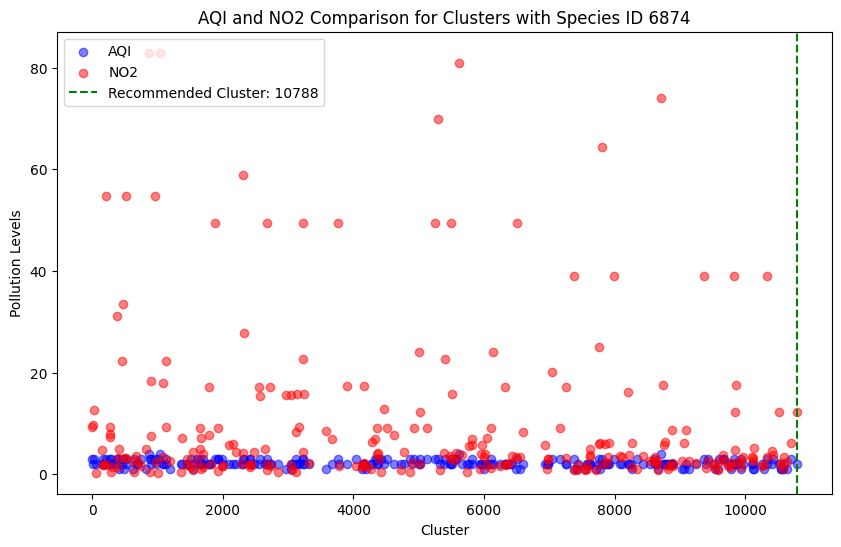

In [39]:
import matplotlib.pyplot as plt

# Function to find clusters containing the input species ID
def find_clusters_with_species(df, input_species_id):
    # Find rows where the species ID is present
    species_clusters = df[df['speciesId'].apply(lambda species_list: input_species_id in species_list)]
    # Extract unique clusters that contain this species
    return species_clusters['cluster'].unique()

# Function to plot AQI and NO2 comparison between recommended and other clusters
def plot_aqi_no2_comparison(df, input_species_id, recommended_cluster):
    # Find clusters containing the input species ID
    clusters_with_species = find_clusters_with_species(df, input_species_id)

    # Filter data for the relevant clusters
    relevant_data = df[df['cluster'].isin(clusters_with_species)]

    # Initialize lists to store AQI and NO2 values for plotting
    aqi_values = []
    no2_values = []
    clusters = []

    # Iterate over the relevant data to gather AQI and NO2 values
    for idx, row in relevant_data.iterrows():
        clusters.append(row['cluster'])
        aqi_values.append(row['AQI'])
        no2_values.append(row['NO2'])

    # Plot AQI vs. NO2 for the clusters containing the input species
    plt.figure(figsize=(10, 6))
    plt.scatter(clusters, aqi_values, label='AQI', color='blue', alpha=0.5)
    plt.scatter(clusters, no2_values, label='NO2', color='red', alpha=0.5)

    # Use a vertical line (axvline) to indicate the recommended cluster
    plt.axvline(x=recommended_cluster, color='green', linestyle='--', label=f'Recommended Cluster: {recommended_cluster}')
    
    # Adding labels and title
    plt.xlabel('Cluster')
    plt.ylabel('Pollution Levels')
    plt.title(f"AQI and NO2 Comparison for Clusters with Species ID {input_species_id}")
    plt.legend(loc='upper left')
    plt.show()

# Main code to execute the functionality
def main():
    try:
        input_species_id = int(input("Enter the species ID to find the clusters: "))
    except ValueError:
        print("Invalid input. Please enter a numerical species ID.")
        return

    print(f"Finding clusters with species ID {input_species_id}...")

    # Plot comparison of AQI and NO2
    plot_aqi_no2_comparison(merged_data, input_species_id, recommended_cluster=10788)

# Run the main function
if __name__ == "__main__":
    main()

Finding clusters with species ID 6874...


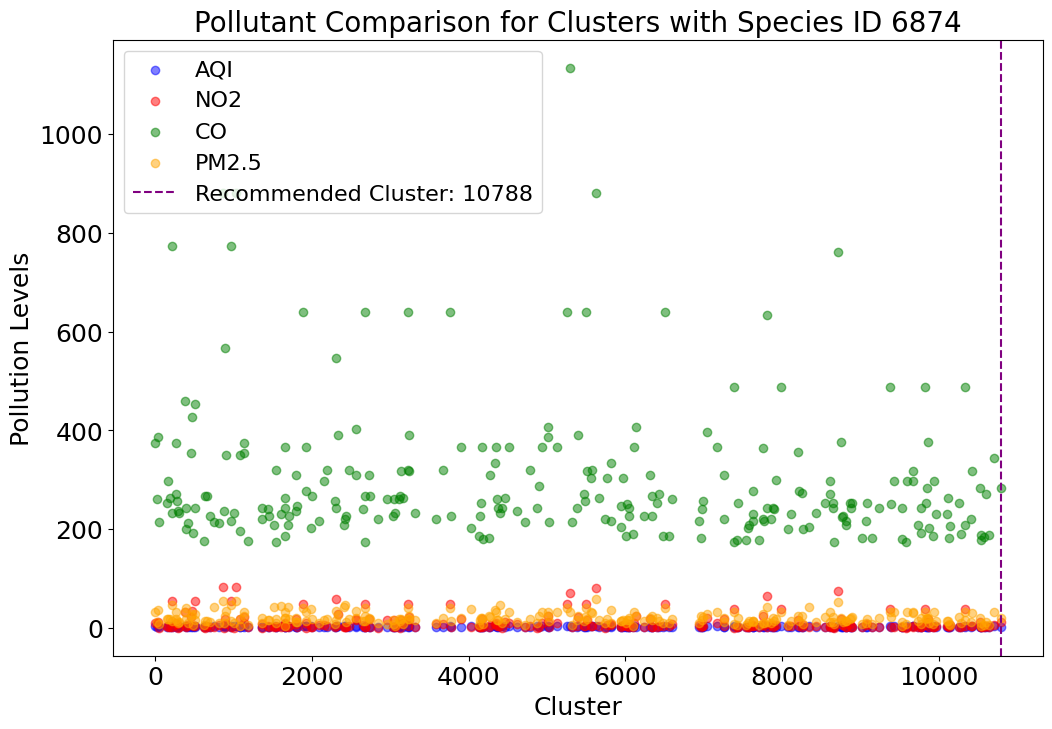

In [48]:
import matplotlib.pyplot as plt

# Function to find clusters containing the input species ID
def find_clusters_with_species(df, input_species_id):
    # Find rows where the species ID is present
    species_clusters = df[df['speciesId'].apply(lambda species_list: input_species_id in species_list)]
    # Extract unique clusters that contain this species
    return species_clusters['cluster'].unique()

# Function to plot AQI, NO2, CO, and PM2.5 comparison between recommended and other clusters
def plot_pollutant_comparison(df, input_species_id, recommended_cluster):
    # Find clusters containing the input species ID
    clusters_with_species = find_clusters_with_species(df, input_species_id)

    # Filter data for the relevant clusters
    relevant_data = df[df['cluster'].isin(clusters_with_species)]

    # Initialize lists to store pollutant values for plotting
    aqi_values = []
    no2_values = []
    co_values = []
    pm25_values = []
    clusters = []

    # Iterate over the relevant data to gather pollutant values
    for idx, row in relevant_data.iterrows():
        clusters.append(row['cluster'])
        aqi_values.append(row['AQI'])
        no2_values.append(row['NO2'])
        co_values.append(row['CO'])
        pm25_values.append(row['PM2.5'])

    # Plot AQI, NO2, CO, and PM2.5 for the clusters containing the input species
    plt.figure(figsize=(12, 8))
    
    # Scatter plots for each pollutant
    plt.scatter(clusters, aqi_values, label='AQI', color='blue', alpha=0.5)
    plt.scatter(clusters, no2_values, label='NO2', color='red', alpha=0.5)
    plt.scatter(clusters, co_values, label='CO', color='green', alpha=0.5)
    plt.scatter(clusters, pm25_values, label='PM2.5', color='orange', alpha=0.5)

    # Use a vertical line (axvline) to indicate the recommended cluster
    plt.axvline(x=recommended_cluster, color='purple', linestyle='--', label=f'Recommended Cluster: {recommended_cluster}')
    
    # Adding labels and title with larger font sizes
    plt.xlabel('Cluster', fontsize=18)
    plt.ylabel('Pollution Levels', fontsize=18)
    plt.title(f"Pollutant Comparison for Clusters with Species ID {input_species_id}", fontsize=20)
    
    # Increase font size for the legend
    plt.legend(loc='upper left', fontsize=16)
    
    # Show plot
    plt.show()

# Main code to execute the functionality
def main():
    try:
        input_species_id = int(input("Enter the species ID to find the clusters: "))
    except ValueError:
        print("Invalid input. Please enter a numerical species ID.")
        return

    print(f"Finding clusters with species ID {input_species_id}...")

    # Plot comparison of pollutants
    plot_pollutant_comparison(merged_data, input_species_id, recommended_cluster=10788)

# Run the main function
if __name__ == "__main__":
    main()

Selected Species ID: 6874
Species ID 6874 found in Cluster 10788.
Species in Cluster 10788: [30.0, 37.0, 51.0, 67.0, 69.0, 74.0, 76.0, 81.0, 82.0, 140.0, 141.0, 146.0, 148.0, 154.0, 164.0, 180.0, 192.0, 203.0, 216.0, 238.0, 245.0, 249.0, 252.0, 254.0, 262.0, 265.0, 267.0, 269.0, 271.0, 272.0, 305.0, 311.0, 320.0, 326.0, 340.0, 351.0, 354.0, 355.0, 365.0, 392.0, 400.0, 410.0, 413.0, 423.0, 436.0, 446.0, 449.0, 450.0, 461.0, 462.0, 476.0, 480.0, 491.0, 493.0, 494.0, 495.0, 509.0, 515.0, 522.0, 540.0, 544.0, 545.0, 553.0, 558.0, 559.0, 578.0, 581.0, 628.0, 633.0, 636.0, 639.0, 661.0, 687.0, 694.0, 701.0, 712.0, 715.0, 751.0, 752.0, 783.0, 787.0, 795.0, 812.0, 822.0, 838.0, 850.0, 857.0, 868.0, 876.0, 877.0, 886.0, 887.0, 893.0, 895.0, 902.0, 906.0, 908.0, 923.0, 944.0, 945.0, 949.0, 950.0, 960.0, 963.0, 976.0, 981.0, 982.0, 986.0, 996.0, 999.0, 1014.0, 1015.0, 1018.0, 1019.0, 1027.0, 1051.0, 1062.0, 1071.0, 1073.0, 1092.0, 1099.0, 1119.0, 1121.0, 1125.0, 1132.0, 1139.0, 1140.0, 1152.0, 11

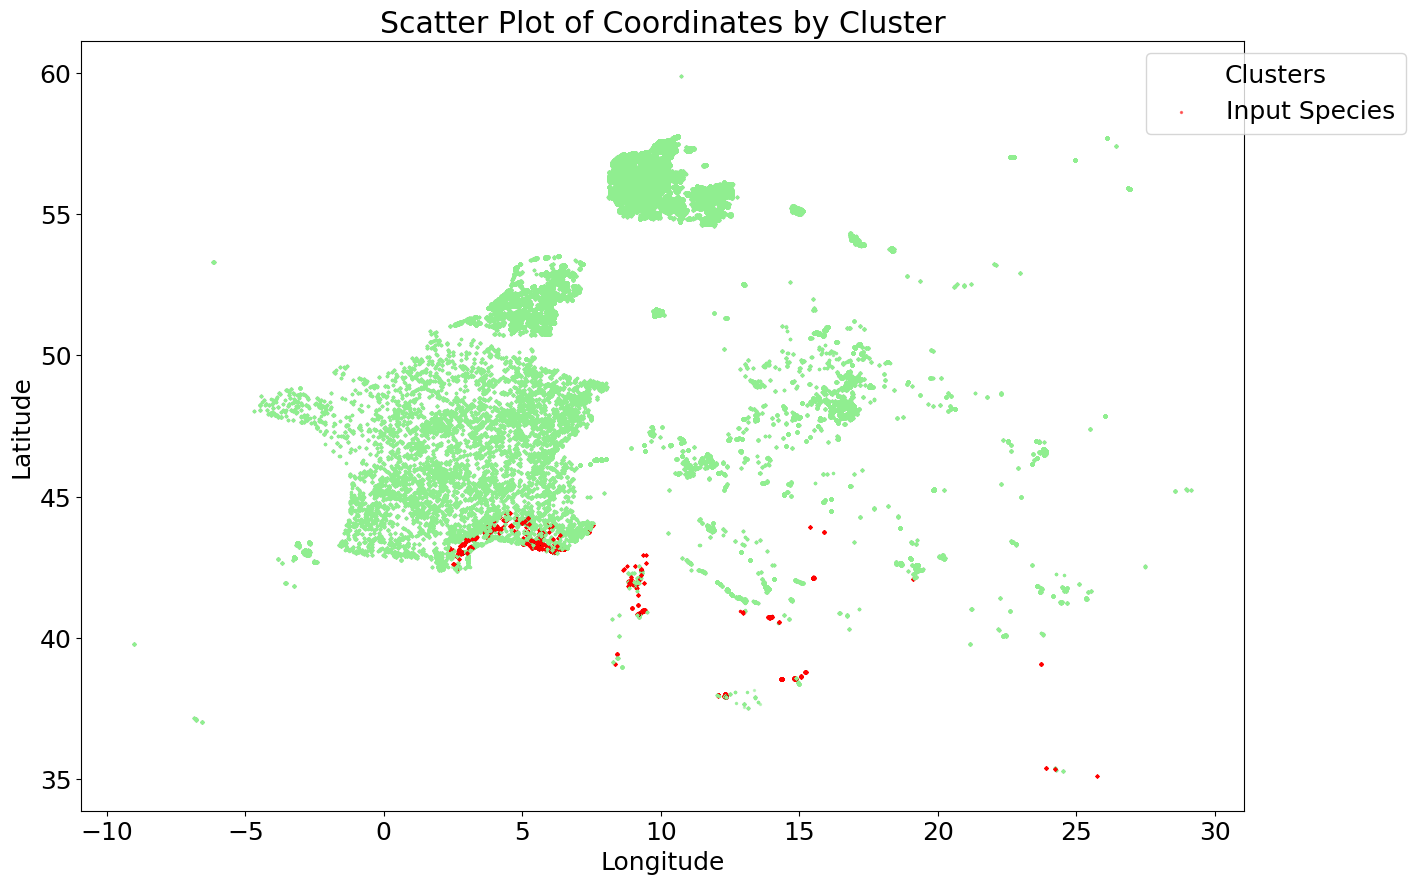

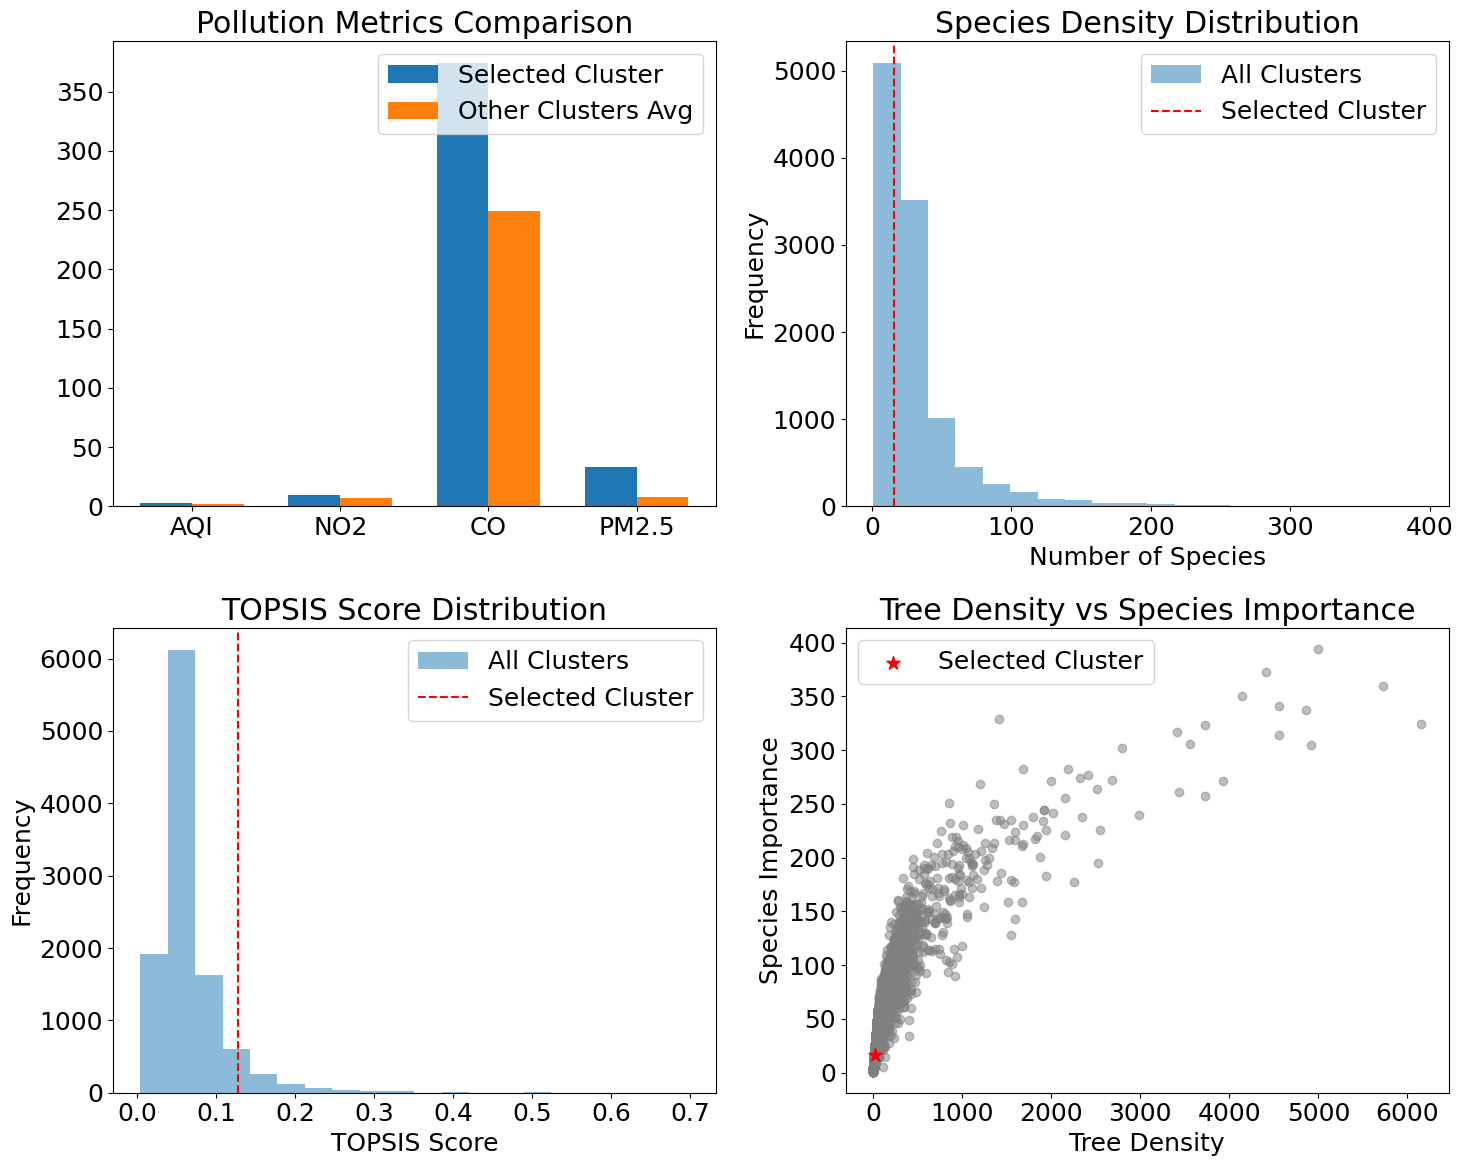


Cluster Evaluation Summary
--------------------------------------------------
Selected Cluster: 0
TOPSIS Score: 0.127
Rank among all clusters: 1 of 10800

Pollution Metrics:
AQI: 3.00 (Cluster) vs 1.54 (Others)
NO2: 9.25 (Cluster) vs 6.77 (Others)
CO: 373.84 (Cluster) vs 248.93 (Others)
PM2.5: 32.71 (Cluster) vs 7.53 (Others)

Species Count: 16
Tree Density: 16


In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Set font size to 3x larger
plt.rcParams.update({'font.size': 18})  # You can adjust this value based on your preference

def evaluate_cluster_recommendation(merged_data, input_species_id):
    """
    Evaluates cluster performance for a given species ID using existing data and criteria
    """
    # Get weights manually since ahpy might have compatibility issues
    weights = {
        'AQI_Impact': 0.6,
        'Species_Importance': 0.3,
        'Tree_Density': 0.1
    }
    
    # Get TOPSIS rankings using existing function
    ranked_clusters = topsis_ranking(merged_data, weights)
    
    # Find clusters containing the input species
    species_clusters = merged_data[merged_data['speciesId'].apply(lambda x: input_species_id in x)]
    
    if not species_clusters.empty:
        actual_cluster = species_clusters.iloc[0]['cluster']
    else:
        actual_cluster = ranked_clusters.iloc[0]['cluster']
    
    # Create evaluation plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Pollution Metrics Comparison (Top Left)
    cluster_data = merged_data[merged_data['cluster'] == actual_cluster]
    other_clusters = merged_data[merged_data['cluster'] != actual_cluster]
    
    pollution_metrics = ['AQI', 'NO2', 'CO', 'PM2.5']
    cluster_means = [cluster_data[metric].mean() for metric in pollution_metrics]
    other_means = [other_clusters[metric].mean() for metric in pollution_metrics]
    
    x = np.arange(len(pollution_metrics))
    width = 0.35
    
    axes[0,0].bar(x - width/2, cluster_means, width, label='Selected Cluster')
    axes[0,0].bar(x + width/2, other_means, width, label='Other Clusters Avg')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(pollution_metrics)
    axes[0,0].set_title('Pollution Metrics Comparison')
    axes[0,0].legend()
    
    # 2. Species Density Distribution (Top Right)
    species_counts = merged_data['Species_Importance']
    axes[0,1].hist(species_counts, bins=20, alpha=0.5, label='All Clusters')
    axes[0,1].axvline(cluster_data['Species_Importance'].iloc[0], color='r', 
                      linestyle='dashed', label='Selected Cluster')
    axes[0,1].set_title('Species Density Distribution')
    axes[0,1].set_xlabel('Number of Species')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].legend()
    
    # 3. TOPSIS Score Distribution (Bottom Left)
    axes[1,0].hist(ranked_clusters['TOPSIS_Score'], bins=20, alpha=0.5, label='All Clusters')
    cluster_score = ranked_clusters[ranked_clusters['cluster'] == actual_cluster]['TOPSIS_Score'].iloc[0]
    axes[1,0].axvline(cluster_score, color='r', linestyle='dashed', label='Selected Cluster')
    axes[1,0].set_title('TOPSIS Score Distribution')
    axes[1,0].set_xlabel('TOPSIS Score')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
    
    # 4. Tree Density vs Species Importance (Bottom Right)
    scatter = axes[1,1].scatter(merged_data['Tree_Density'], 
                              merged_data['Species_Importance'],
                              alpha=0.5, c='gray')
    cluster_point = cluster_data[['Tree_Density', 'Species_Importance']].iloc[0]
    axes[1,1].scatter(cluster_point['Tree_Density'], 
                     cluster_point['Species_Importance'],
                     color='red', s=100, marker='*', label='Selected Cluster')
    axes[1,1].set_title('Tree Density vs Species Importance')
    axes[1,1].set_xlabel('Tree Density')
    axes[1,1].set_ylabel('Species Importance')
    axes[1,1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print evaluation summary
    print("\nCluster Evaluation Summary")
    print("-" * 50)
    print(f"Selected Cluster: {actual_cluster}")
    print(f"TOPSIS Score: {cluster_score:.3f}")
    print(f"Rank among all clusters: {ranked_clusters.index[ranked_clusters['cluster'] == actual_cluster][0] + 1} of {len(ranked_clusters)}")
    print("\nPollution Metrics:")
    for metric in pollution_metrics:
        print(f"{metric}: {cluster_data[metric].mean():.2f} (Cluster) vs {other_clusters[metric].mean():.2f} (Others)")
    print(f"\nSpecies Count: {cluster_data['Species_Importance'].iloc[0]}")
    print(f"Tree Density: {cluster_data['Tree_Density'].iloc[0]}")

# Modify only the last part of your main() function:
def main():
    # Your existing code remains the same until the plot_clusters call
    merged_data = load_data()
    merged_data = calculate_criteria(merged_data)

    try:
        input_species_id = int(input("Enter the species ID to highlight: "))
    except ValueError:
        print("Invalid input. Please enter a numerical species ID.")
        return

    print(f"Selected Species ID: {input_species_id}")

    # Your existing visualization
    plot_clusters(merged_data, input_species_id)
    
    # Add the new evaluation
    evaluate_cluster_recommendation(merged_data, input_species_id)

if __name__ == "__main__":
    main()


Analyzing Species ID: 6874
Species ID 6874 found in Cluster 10788.
Species in Cluster 10788: [30.0, 37.0, 51.0, 67.0, 69.0, 74.0, 76.0, 81.0, 82.0, 140.0, 141.0, 146.0, 148.0, 154.0, 164.0, 180.0, 192.0, 203.0, 216.0, 238.0, 245.0, 249.0, 252.0, 254.0, 262.0, 265.0, 267.0, 269.0, 271.0, 272.0, 305.0, 311.0, 320.0, 326.0, 340.0, 351.0, 354.0, 355.0, 365.0, 392.0, 400.0, 410.0, 413.0, 423.0, 436.0, 446.0, 449.0, 450.0, 461.0, 462.0, 476.0, 480.0, 491.0, 493.0, 494.0, 495.0, 509.0, 515.0, 522.0, 540.0, 544.0, 545.0, 553.0, 558.0, 559.0, 578.0, 581.0, 628.0, 633.0, 636.0, 639.0, 661.0, 687.0, 694.0, 701.0, 712.0, 715.0, 751.0, 752.0, 783.0, 787.0, 795.0, 812.0, 822.0, 838.0, 850.0, 857.0, 868.0, 876.0, 877.0, 886.0, 887.0, 893.0, 895.0, 902.0, 906.0, 908.0, 923.0, 944.0, 945.0, 949.0, 950.0, 960.0, 963.0, 976.0, 981.0, 982.0, 986.0, 996.0, 999.0, 1014.0, 1015.0, 1018.0, 1019.0, 1027.0, 1051.0, 1062.0, 1071.0, 1073.0, 1092.0, 1099.0, 1119.0, 1121.0, 1125.0, 1132.0, 1139.0, 1140.0, 1152.0, 

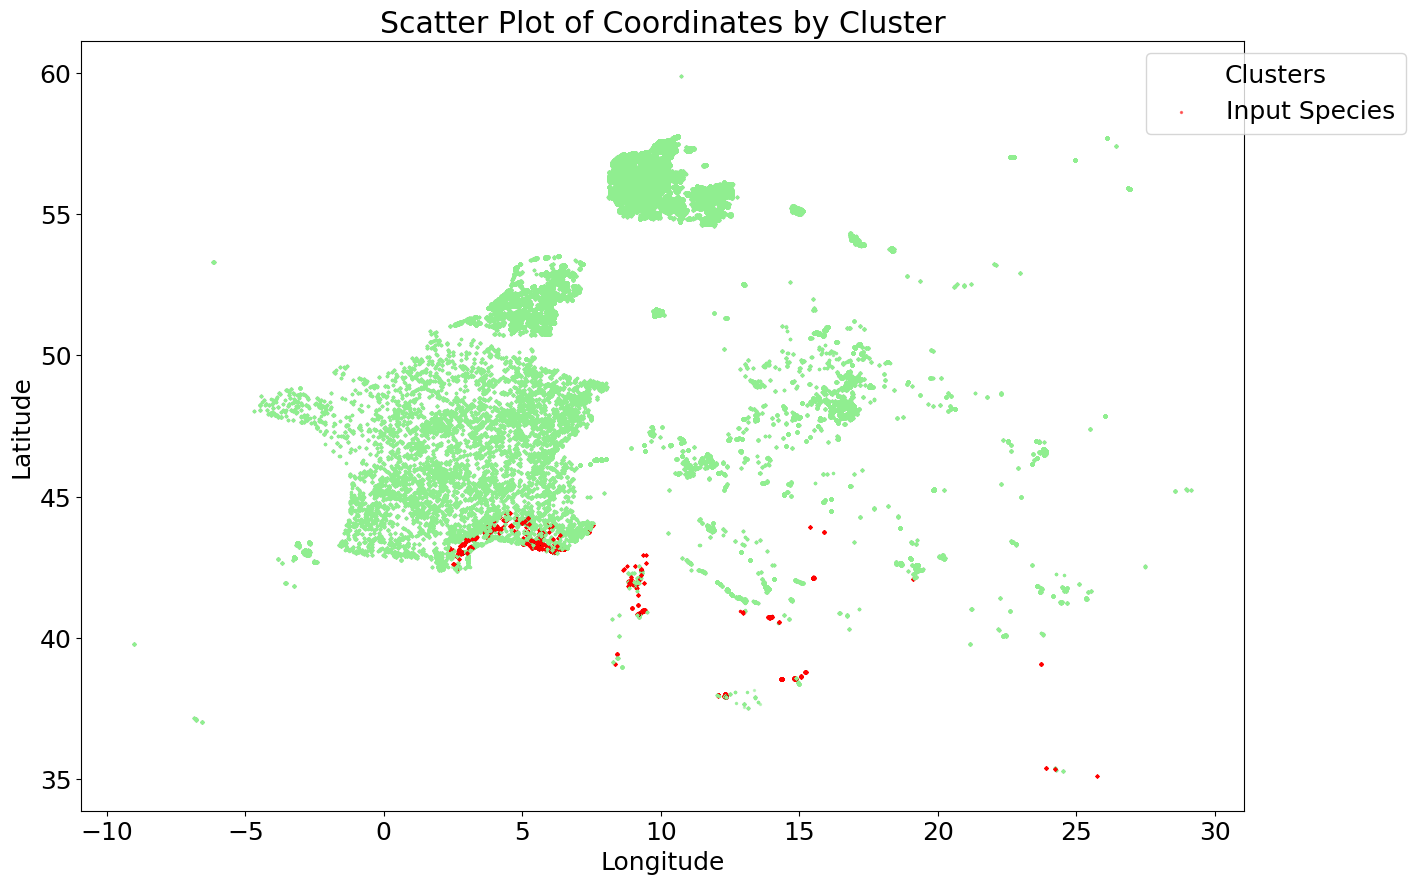

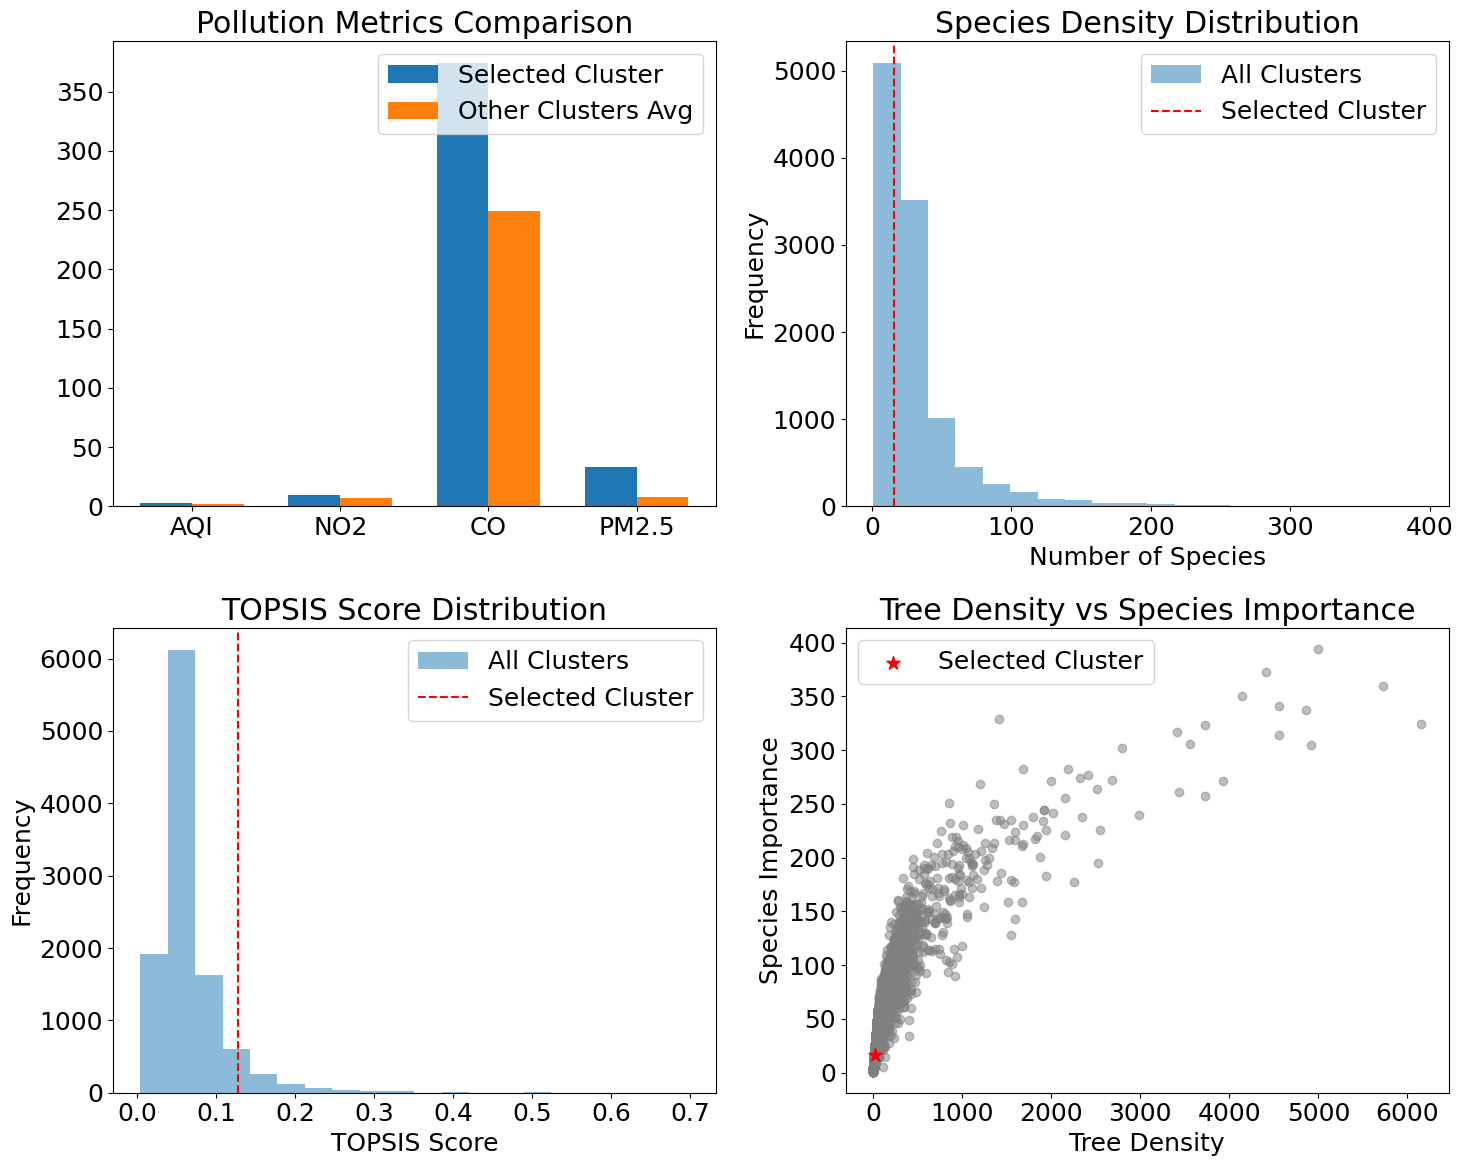


Cluster Evaluation Summary
--------------------------------------------------
Selected Cluster: 0
TOPSIS Score: 0.127
Rank among all clusters: 1 of 10800

Pollution Metrics:
AQI: 3.00 (Cluster) vs 1.54 (Others)
NO2: 9.25 (Cluster) vs 6.77 (Others)
CO: 373.84 (Cluster) vs 248.93 (Others)
PM2.5: 32.71 (Cluster) vs 7.53 (Others)

Species Count: 16
Tree Density: 16

=== Basic Species Metrics ===
Total Trees of Species: 260
Species Prevalence: 2.41%

=== Environmental Impact ===
Overall Average AQI: 1.54
Species Location AQI: 2.17
AQI Difference: 41.34%

=== Pollution Impact ===
NO2 Impact Difference: 46.92%
CO Impact Difference: 18.73%
PM2.5 Impact Difference: 164.15%

=== Spatial Distribution ===


KeyError: "None of [Index(['latitude', 'longitude'], dtype='object')] are in the [columns]"

In [49]:
def analyze_species_impact(merged_data, input_species_id):
    """
    Analyzes the impact and characteristics of a specific tree species in the dataset
    
    Args:
        merged_data (pd.DataFrame): The merged dataset containing tree and environmental data
        input_species_id (int): The ID of the species to analyze
    """
    # Get species-specific data
    species_trees = merged_data[merged_data['speciesId'].apply(lambda x: input_species_id in x)]
    
    if species_trees.empty:
        print(f"No trees found for species ID {input_species_id}")
        return
        
    total_trees = len(merged_data)
    species_count = len(species_trees)
    
    print("\n=== Basic Species Metrics ===")
    print(f"Total Trees of Species: {species_count}")
    print(f"Species Prevalence: {(species_count/total_trees * 100):.2f}%")
    
    print("\n=== Environmental Impact ===")
    all_aqi = merged_data['AQI'].mean()
    species_aqi = species_trees['AQI'].mean()
    print(f"Overall Average AQI: {all_aqi:.2f}")
    print(f"Species Location AQI: {species_aqi:.2f}")
    print(f"AQI Difference: {((species_aqi - all_aqi)/all_aqi * 100):.2f}%")
    
    print("\n=== Pollution Impact ===")
    metrics = ['NO2', 'CO', 'PM2.5']
    for metric in metrics:
        all_metric = merged_data[metric].mean()
        species_metric = species_trees[metric].mean()
        print(f"{metric} Impact Difference: {((species_metric - all_metric)/all_metric * 100):.2f}%")
    
    print("\n=== Spatial Distribution ===")
    # Calculate average distance between trees of this species
    if len(species_trees) > 1:
        from scipy.spatial.distance import pdist
        coords = species_trees[['latitude', 'longitude']].values
        avg_distance = pdist(coords).mean()
        print(f"Average Distance Between Trees: {avg_distance:.4f} degrees")
        
        # Calculate density (trees per square degree)
        area = (species_trees['latitude'].max() - species_trees['latitude'].min()) * \
               (species_trees['longitude'].max() - species_trees['longitude'].min())
        density = len(species_trees) / area if area > 0 else 0
        print(f"Species Density: {density:.6f} trees per sq degree")
    
    print("\n=== Cluster Distribution ===")
    clusters = species_trees['cluster'].unique()
    print(f"Number of Clusters: {len(clusters)}")
    print(f"Average Trees per Cluster: {(len(species_trees) / len(clusters)):.2f}")
    
    print("\n=== Species Importance ===")
    importance_score = species_trees['Species_Importance'].mean()
    overall_importance = merged_data['Species_Importance'].mean()
    print(f"Species Importance Score: {importance_score:.2f}")
    print(f"Overall Importance Average: {overall_importance:.2f}")
    print(f"Relative Importance: {((importance_score - overall_importance)/overall_importance * 100):.2f}%")
    
    print("\n=== Tree Characteristics ===")
    density_score = species_trees['Tree_Density'].mean()
    overall_density = merged_data['Tree_Density'].mean()
    print(f"Average Tree Density: {density_score:.2f}")
    print(f"Overall Density Average: {overall_density:.2f}")
    print(f"Relative Density: {((density_score - overall_density)/overall_density * 100):.2f}%")

def main():
    # Your existing code remains the same until the plot_clusters call
    merged_data = load_data()
    merged_data = calculate_criteria(merged_data)

    try:
        input_species_id = int(input("Enter the species ID to analyze: "))
    except ValueError:
        print("Invalid input. Please enter a numerical species ID.")
        return

    print(f"\nAnalyzing Species ID: {input_species_id}")

    # Run both analyses
    plot_clusters(merged_data, input_species_id)
    evaluate_cluster_recommendation(merged_data, input_species_id)
    analyze_species_impact(merged_data, input_species_id)

if __name__ == "__main__":
    main()


Recommended Cluster Metrics:
AQI in Cluster 10788: 2
CO in Cluster 10788: 283.72
NO2 in Cluster 10788: 12.34
PM2.5 in Cluster 10788: 19.46

Other Clusters Containing the Species:
Average AQI in Other Clusters: 2.1737451737451736
Average CO in Other Clusters: 295.6202316602316
Average NO2 in Other Clusters: 9.94138996138996
Average PM2.5 in Other Clusters: 19.893281853281852


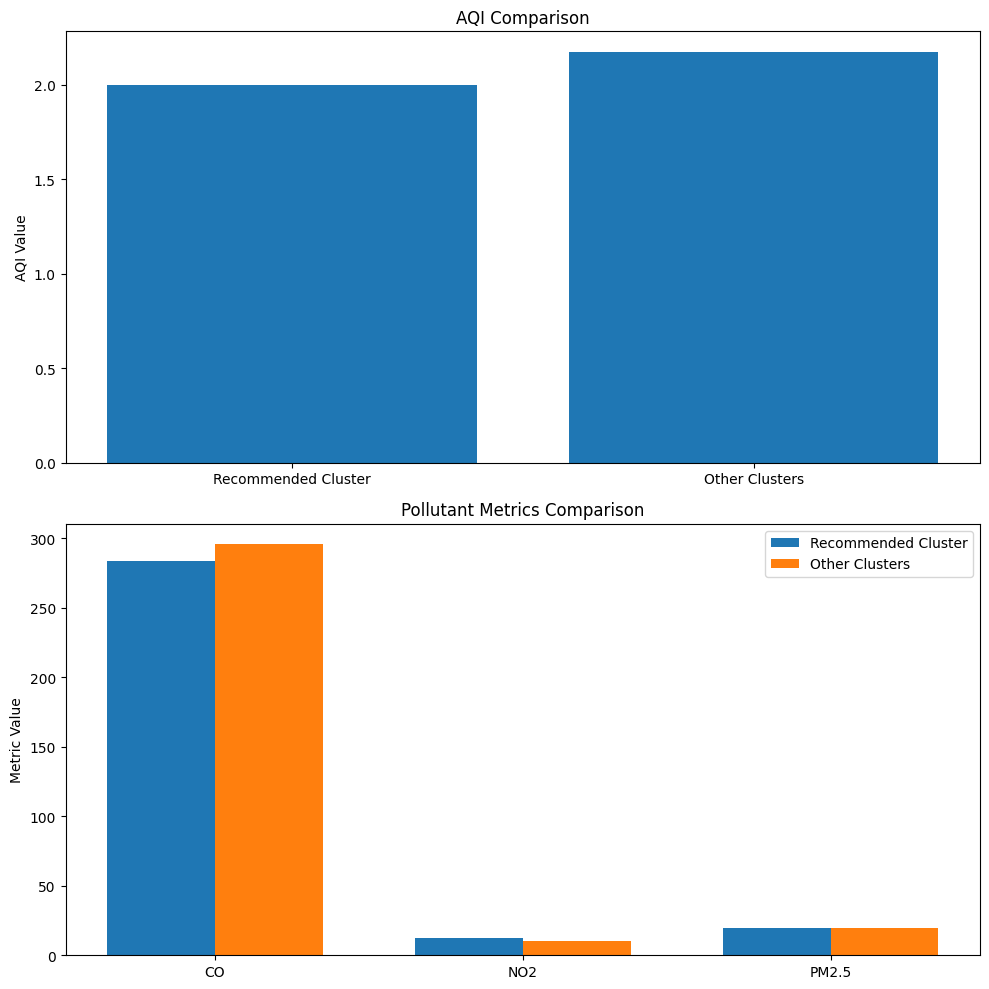

In [11]:
def analyze_cluster_metrics(df, input_species_id, recommended_cluster):
    # Find clusters containing the input species
    species_clusters = df[df['speciesId'].apply(lambda x: input_species_id in x)]
    
    if species_clusters.empty:
        print(f"Species ID {input_species_id} not found in any clusters.")
        return
    
    # Get the recommended cluster data
    recommended_cluster_data = df[df['cluster'] == recommended_cluster]
    
    if recommended_cluster_data.empty:
        print(f"Cluster {recommended_cluster} not found.")
        return
    
    # Metrics to analyze
    metrics = ['AQI', 'CO', 'NO2', 'PM2.5']
    
    # Print metrics for recommended cluster
    print("\nRecommended Cluster Metrics:")
    for metric in metrics:
        recommended_value = recommended_cluster_data[metric].values[0]
        print(f"{metric} in Cluster {recommended_cluster}: {recommended_value}")
    
    # Calculate metrics for other clusters containing the species
    other_clusters = df[
        (df['speciesId'].apply(lambda x: input_species_id in x)) & 
        (df['cluster'] != recommended_cluster)
    ]
    
    print("\nOther Clusters Containing the Species:")
    for metric in metrics:
        other_clusters_values = other_clusters[metric]
        if not other_clusters_values.empty:
            metric_avg = other_clusters_values.mean()
            print(f"Average {metric} in Other Clusters: {metric_avg}")
        else:
            print(f"No other clusters found for {metric}")
    
    # Plotting
    import matplotlib.pyplot as plt
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # AQI Plot
    aqi_data = [recommended_cluster_data['AQI'].values[0], 
                other_clusters['AQI'].mean() if not other_clusters.empty else 0]
    ax1.bar(['Recommended Cluster', 'Other Clusters'], aqi_data)
    ax1.set_title('AQI Comparison')
    ax1.set_ylabel('AQI Value')
    
    # Pollutant Metrics Plot
    pollutant_metrics = ['CO', 'NO2', 'PM2.5']
    pollutant_data = [
        [recommended_cluster_data[metric].values[0] for metric in pollutant_metrics],
        [other_clusters[metric].mean() if not other_clusters.empty else 0 for metric in pollutant_metrics]
    ]
    
    x = np.arange(len(pollutant_metrics))
    width = 0.35
    
    ax2.bar(x - width/2, pollutant_data[0], width, label='Recommended Cluster')
    ax2.bar(x + width/2, pollutant_data[1], width, label='Other Clusters')
    ax2.set_title('Pollutant Metrics Comparison')
    ax2.set_xticks(x)
    ax2.set_xticklabels(pollutant_metrics)
    ax2.set_ylabel('Metric Value')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Modify main function to take both species ID and cluster
def main():
    # Load and prepare data
    merged_data = load_data()
    merged_data = calculate_criteria(merged_data)

    # Get user input for species ID and cluster
    try:
        input_species_id = int(input("Enter the species ID: "))
        recommended_cluster = int(input("Enter the recommended cluster: "))
    except ValueError:
        print("Invalid input. Please enter numerical values.")
        return

    # Analyze and plot metrics
    analyze_cluster_metrics(merged_data, input_species_id, recommended_cluster)
    
    
if __name__ == "__main__":
    main()

In [14]:
def evaluate_cluster_performance(df, recommended_cluster):
    # Performance metrics calculation
    performance_metrics = {}
    
    # 1. Species Diversity
    performance_metrics['unique_species_count'] = len(set([species for species_list in df[df['cluster'] == recommended_cluster]['speciesId'] for species in species_list]))
    
    # 2. Spatial Metrics
    cluster_data = df[df['cluster'] == recommended_cluster]
    performance_metrics['location_count'] = len(cluster_data['coordinates_lon'].iloc[0])
    
    # 3. Geographic Spread
    longitudes = cluster_data['coordinates_lon'].iloc[0]
    latitudes = cluster_data['coordinates_lat'].iloc[0]
    performance_metrics['longitude_range'] = max(longitudes) - min(longitudes)
    performance_metrics['latitude_range'] = max(latitudes) - min(latitudes)
    
    # 4. Pollution Concentration Metrics
    pollution_metrics = ['AQI', 'CO', 'NO2', 'PM2.5']
    for metric in pollution_metrics:
        performance_metrics[f'{metric}_value'] = cluster_data[metric].values[0]
    
    # 5. Density Calculations
    # Area calculation using a simple bounding box method
    performance_metrics['bounding_box_area'] = performance_metrics['longitude_range'] * performance_metrics['latitude_range']
    performance_metrics['location_density'] = performance_metrics['location_count'] / performance_metrics['bounding_box_area'] if performance_metrics['bounding_box_area'] > 0 else 0
    
    # Printing Performance Metrics
    print("\nCluster Performance Metrics:")
    for key, value in performance_metrics.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
    
    return performance_metrics

# Modify main function to include performance evaluation
def main():
    # Load and prepare data
    merged_data = load_data()
    merged_data = calculate_criteria(merged_data)

    # Get user input for recommended cluster
    try:
        recommended_cluster = int(input("Enter the recommended cluster: "))
    except ValueError:
        print("Invalid input. Please enter a numerical cluster.")
        return

    # Evaluate cluster performance
    performance_metrics = evaluate_cluster_performance(merged_data, recommended_cluster)
    
if __name__ == "__main__":
    main()


Cluster Performance Metrics:
Unique Species Count: 23
Location Count: 23
Longitude Range: 0.0
Latitude Range: 0.0
Aqi Value: 2
Co Value: 283.72
No2 Value: 12.34
Pm2.5 Value: 19.46
Bounding Box Area: 0.0
Location Density: 0


In [15]:
def advanced_cluster_performance(df, recommended_cluster):
    from sklearn.metrics import silhouette_score
    import numpy as np

    # Extract cluster coordinates
    cluster_data = df[df['cluster'] == recommended_cluster]
    coords = np.column_stack([
        np.concatenate(cluster_data['coordinates_lon'].values),
        np.concatenate(cluster_data['coordinates_lat'].values)
    ])

    # Performance Metrics
    performance_metrics = {}

    # 1. Silhouette Score (Cluster Cohesion)
    all_coords = np.column_stack([
        np.concatenate(df['coordinates_lon'].values),
        np.concatenate(df['coordinates_lat'].values)
    ])
    all_labels = np.repeat(df['cluster'].values, df['coordinates_lon'].apply(len))
    performance_metrics['silhouette_score'] = silhouette_score(all_coords, all_labels)

    # 2. Intra-Cluster Variance
    performance_metrics['coordinate_variance'] = {
        'longitude_variance': np.var(coords[:, 0]),
        'latitude_variance': np.var(coords[:, 1])
    }

    # 3. Cluster Spread
    performance_metrics['cluster_spread'] = {
        'longitude_range': np.ptp(coords[:, 0]),
        'latitude_range': np.ptp(coords[:, 1])
    }

    # 4. Species Distribution Entropy
    def calculate_entropy(species_lists):
        from scipy.stats import entropy
        all_species = [species for sublist in species_lists for species in sublist]
        unique, counts = np.unique(all_species, return_counts=True)
        return entropy(counts)

    performance_metrics['species_entropy'] = calculate_entropy(cluster_data['speciesId'])

    # 5. Pollution Concentration Index
    pollution_metrics = ['AQI', 'CO', 'NO2', 'PM2.5']
    performance_metrics['pollution_concentration'] = {
        metric: cluster_data[metric].values[0] / df[metric].mean() 
        for metric in pollution_metrics
    }

    # Print Performance Metrics
    print("\nAdvanced Cluster Performance Metrics:")
    for key, value in performance_metrics.items():
        print(f"{key.replace('_', ' ').title()}:")
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                print(f"  {subkey.replace('_', ' ').title()}: {subvalue}")
        else:
            print(f"  {value}")

    return performance_metrics

# Modify main function to include advanced performance evaluation
def main():
    # Load and prepare data
    merged_data = load_data()
    merged_data = calculate_criteria(merged_data)

    # Get user input for recommended cluster
    try:
        recommended_cluster = int(input("Enter the recommended cluster: "))
    except ValueError:
        print("Invalid input. Please enter a numerical cluster.")
        return

    # Evaluate cluster performance
    advanced_cluster_performance(merged_data, recommended_cluster)
    
if __name__ == "__main__":
    main()

KeyboardInterrupt: 